In [1]:
#The file is analyzed by EDA, and the statistics of all activities and the heat diagram of the relationship between activities and sensors are displayed visually.
#import libraries
import pandas as pd
import numpy as np
import scipy
import datetime
import numexpr
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_squared_error, r2_score
from math import * 

In [2]:
#Read the data set after data cleaning
R1_sleep=pd.read_csv('data/R1_sleep_data.csv') 
R2_sleep=pd.read_csv('data/R2_sleep_data.csv') 

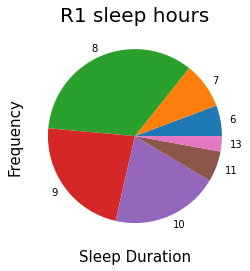

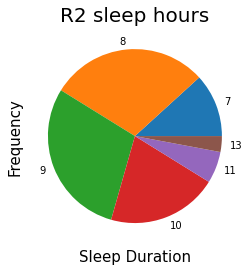

In [3]:
#Determine the duration of sleep, using an array
def sleep_continue(activity,strh):
    list=[]
    for i in range(0,len(activity)):
        if(i%2==0):#Odd number, which is begin
            hour1= int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])  
            hour2= int(activity.loc[i+1]['Datetime'][11])*10+int(activity.loc[i+1]['Datetime'][12])
            if hour2<hour1:
                temp=hour2+24-hour1
            else:
                temp=hour2-hour1
            list.append(temp) 
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    dict1.plot(kind='pie')
    plt.xlabel("Sleep Duration", fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.title(strh,fontsize = 20)
    plt.show()
    return dict1   

dict1=sleep_continue(R1_sleep,'R1 sleep hours')
dict1=sleep_continue(R2_sleep,'R2 sleep hours')

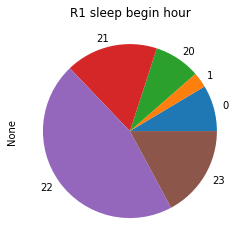

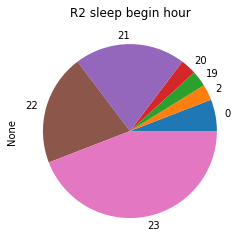

In [4]:
##Determine the start time of sleep, using an array

def sleep_begin(activity,strh):
    list=[]
    for i in range(0,len(activity)):
        if(i%2==0):
            temp= int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])  
            list.append(temp)
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    dict1.plot(kind='pie')
    plt.title(strh)
    plt.show()
    return dict1  
dict1=sleep_begin(R1_sleep,'R1 sleep begin hour')
dict1=sleep_begin(R2_sleep,'R2 sleep begin hour')

In [5]:
R1_Toilet=pd.read_csv('data/R1_Toilet.csv') 
R2_Toilet=pd.read_csv('data/R2_Toilet.csv')

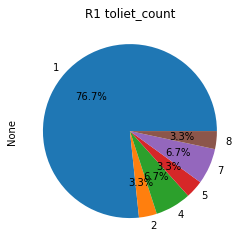

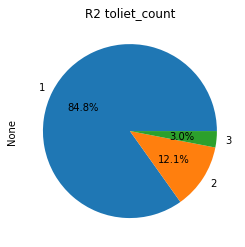

In [6]:
#Count the times of going to the toilet every day.
def toliet_count(activity,strn,strh):
    activity['Datetime']=activity['Datetime'].str.split(' ',expand=True)[0] #Split date
    activity=activity.drop(columns=['Unnamed: 0','Sensor','State']) 
    activity=activity.drop(activity[activity['Activity']==strn].index) #Keep only odd lines.
    #print(activity)
    activity=activity.apply(pd.value_counts)    
    activity=activity.reset_index(drop=True)
    activity=activity.drop([len(activity)-1])
    list_num=int(activity.apply(pd.value_counts)['Datetime'].max()) #Get the highest frequency
    list=[]
    for i in range(0,len(activity)):
            list.append(int(activity.loc[i]['Datetime']))
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    dict1.plot(kind='pie',autopct='%.1f%%')
    plt.title(strh)
    plt.show()
    return dict1  
dict1=toliet_count(R1_Toilet,'R1_Bed_to_Toilet_end','R1 toliet_count')
dict1=toliet_count(R2_Toilet,'R2_Bed_to_Toilet_end','R2 toliet_count')

In [7]:
#Count the time spent going to the toilet.This conclusion is meaningless.
#
# def toliet_time(activity,strh):
#     activity['Datetime']=activity['Datetime'].str.split(' ',expand=True)[1] #分割日期
#     activity['Datetime']=pd.to_datetime(activity['Datetime'])
#     activity=activity.drop(columns=['Unnamed: 0','Sensor','State']) #删掉没用的
#     list=[]
#     for i in range(0,len(activity)):
#         if(i%2==0):#奇数，为begin
#             time=(R1_Toilet.loc[i+1]['Datetime']-R1_Toilet.loc[i]['Datetime']).total_seconds()
#             list.append(int(time/60))
#     #print(list)
#     dict1=pd.value_counts(list)   
#     dict1=dict1.sort_index()
#     dict1.plot(kind='bar')
#     plt.title(strh)
#     plt.show()
#     return dict1  
# dict1=toliet_time(R1_Toilet,'R1 toliet_count')
# dict1=toliet_time(R2_Toilet,'R2 toliet_count')

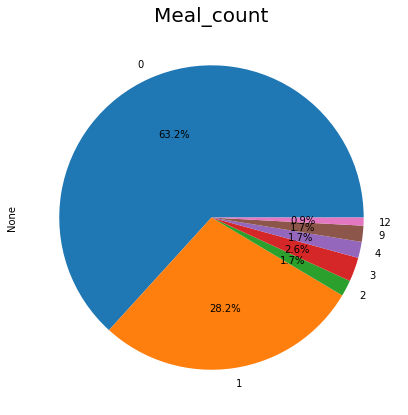

In [8]:
#Count the duration of meal
Meal=pd.read_csv('data/meal.csv') 
def Meal_continue(activity,strh):
    list=[]
    for i in range(0,len(activity)):
        if(i%2==0):#奇数，为begin
            hour1= int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])  
            hour2= int(activity.loc[i+1]['Datetime'][11])*10+int(activity.loc[i+1]['Datetime'][12])
            if hour2<hour1:
                temp=hour2+24-hour1
            else:
                temp=hour2-hour1
            list.append(temp) 
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    plt.figure(figsize=(7,7)) 
    dict1.plot(kind='pie',autopct='%.1f%%')
    plt.title(strh,fontsize = 20)
    plt.show()
    return dict1   
dict1=Meal_continue(Meal,'Meal_count')

Datetime    datetime64[ns]
Activity            object
Note                object
dtype: object
2022-04-24 07:40:06


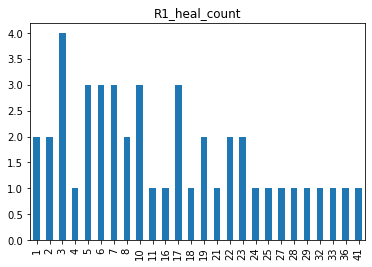

Datetime    datetime64[ns]
Activity            object
Note                object
dtype: object
2022-04-24 22:24:19


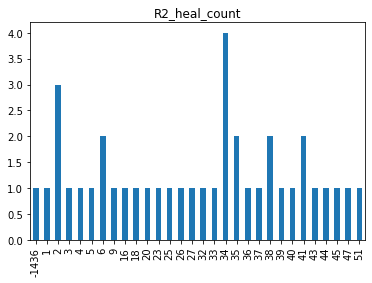

In [9]:
#Personal hygiene, statistical duration, conclusion is useless.
R1_heal=pd.read_csv('data/R1_heal.csv') 
R2_heal=pd.read_csv('data/R2_heal.csv') 
def toliet_time(activity,strh):
    activity['Datetime']=activity['Datetime'].str.split(' ',expand=True)[1] 
    activity['Datetime']=pd.to_datetime(activity['Datetime'])
    activity=activity.drop(columns=['Unnamed: 0','Sensor','State']) 
    print(activity.dtypes)
    print(activity.loc[2]['Datetime'])
    list=[]
    for i in range(0,len(activity)):
        if(i%2==0):
            time=(activity.loc[i+1]['Datetime']-activity.loc[i]['Datetime']).total_seconds()
            list.append(int(time/60))
    #print(list)
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    dict1.plot(kind='bar')
    plt.title(strh)
    plt.show()
    return dict1  
dict1=toliet_time(R1_heal,'R1_heal_count')
dict1=toliet_time(R2_heal,'R2_heal_count')

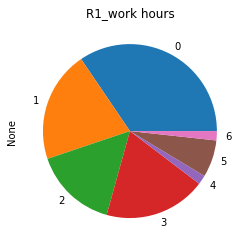

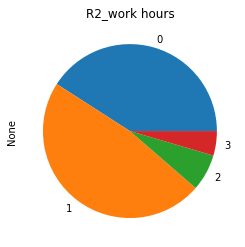

In [10]:
#Statistical working hours
R1_work=pd.read_csv('data/R1work_data1.csv')    
R2_work=pd.read_csv('data/R2work_data.csv')
def work_continue(activity,strh):
    list=[]
    for i in range(0,len(activity)):
        if(i%2==0):
            hour1= int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])  
            hour2= int(activity.loc[i+1]['Datetime'][11])*10+int(activity.loc[i+1]['Datetime'][12])
            if hour2<hour1:
                temp=hour2+24-hour1
            else:
                temp=hour2-hour1
            list.append(temp) 
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    dict1.plot(kind='pie')
    plt.title(strh)
    plt.show()
    return dict1   
dict1=work_continue(R1_work,'R1_work hours')
dict1=work_continue(R2_work,'R2_work hours')

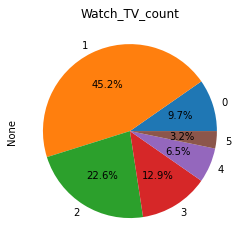

In [11]:
#watch TV
Watch_TV=pd.read_csv('data/Watch_tv.csv') 
def Watch_TV_continue(activity,strh):
    list=[]
    for i in range(0,len(activity)):
        if(i%2==0):#奇数，为begin
            hour1= int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])  
            hour2= int(activity.loc[i+1]['Datetime'][11])*10+int(activity.loc[i+1]['Datetime'][12])
            if hour2<hour1:
                temp=hour2+24-hour1
            else:
                temp=hour2-hour1
            list.append(temp) 
    dict1=pd.value_counts(list)   
    dict1=dict1.sort_index()
    dict1.plot(kind='pie',autopct='%.1f%%')
    plt.title(strh)
    plt.show()
    return dict1   
dict1=Watch_TV_continue(Watch_TV,'Watch_TV_count')

In [12]:
#Relationship between sensors and activities
#Main activities：
All_activities=pd.read_csv('data/activities.csv') 
All_activities=All_activities.drop(['BeginTime','D07','D14','D12','D05','L13','L06','L09','L12','L10','L11','L04'],axis=1) 
All_activities

,Duration,M31,M17,M45,M35,M38,M34,M48,M16,M47,...,M26,D15,M03,M23,M22,D03,I03,M04,M12,Activity
0,0:05:47,0,0,0,29,2,13,0,0,0,...,0,0,0,0,0,0,0,0,0,R1_Bed_to_Toilet
1,0:17:30,0,0,0,0,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R1_Personal_Hygiene
2,0:02:42,0,0,0,0,4,0,3,0,10,...,0,0,0,0,0,0,0,0,0,R2_Bed_to_Toilet
3,0:08:05,0,35,0,0,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,Meal_Preparation
4,0:22:02,0,78,0,0,0,0,0,36,0,...,0,0,0,0,0,0,1,0,0,Meal_Preparation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0:36:50,0,59,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,Meal_Preparation
510,0:22:27,1,59,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,Meal_Preparation
511,1:06:45,551,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R1_Work
512,7:20:48,0,0,0,159,0,179,131,0,97,...,0,0,0,0,0,0,0,0,0,R1_Sleep


In [13]:
All_activities=pd.read_csv('data/table.csv') 
All_activities=All_activities.drop(['BeginTime','D07','D14','D12','D05','L13','L06','L09','L12','L10','L11','L04'],axis=1) 
All_activities

,Duration,M31,M17,M45,M35,M38,M34,M48,M16,M47,...,M26,D15,M03,M23,M22,D03,I03,M04,M12,Activity
0,00:05:47,0,0,0,29,2,13,0,0,0,...,0,0,0,0,0,0,0,0,0,R1_Bed_to_Toilet
1,00:17:30,0,0,0,0,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R1_Personal_Hygiene
2,00:02:42,0,0,0,0,4,0,3,0,10,...,0,0,0,0,0,0,0,0,0,R2_Bed_to_Toilet
3,00:08:05,0,35,0,0,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,Meal_Preparation
4,00:22:02,0,78,0,0,0,0,0,36,0,...,0,0,0,0,0,0,1,0,0,Meal_Preparation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,00:36:50,0,59,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,Meal_Preparation
510,00:22:27,1,59,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,Meal_Preparation
511,01:06:45,551,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R1_Work
512,07:20:48,0,0,0,159,0,179,131,0,97,...,0,0,0,0,0,0,0,0,0,R1_Sleep


In [14]:
for i in range(0,len(All_activities)):
    time=(int(All_activities.loc[i]['Duration'][0])*10+int(All_activities.loc[i]['Duration'][1]))*3600+(int(All_activities.loc[i]['Duration'][3])*10+int(All_activities.loc[i]['Duration'][4]))*60+int(All_activities.loc[i]['Duration'][6])*10+int(All_activities.loc[i]['Duration'][7])
    #time=(int(All_activities.loc[i]['Duration'][0]))*3600+(int(All_activities.loc[i]['Duration'][2])*10+int(All_activities.loc[i]['Duration'][3]))*60+int(All_activities.loc[i]['Duration'][5])*10+int(All_activities.loc[i]['Duration'][6])
    All_activities.loc[i,'Duration']=time
#All_activities

In [15]:
group = All_activities.groupby('Activity')
group.describe()
groups = {}
for k, g in group:
    groups[k]=g  
for i in groups:
    groups[i]=pd.DataFrame(groups[i])

In [21]:
#Add weighted sensors and activity data by hour, and only keep the core sensor.
def sum_and_count(activities):
    columna = ['M31', 'M17', 'M45', 'M35', 'M38', 'M34', 'M48', 'M16',
       'M47', 'AD1-A', 'M18', 'M13', 'AD1-B', 'M15', 'M06', 'M37', 'M09',
       'M39', 'M32', 'M07', 'M14', 'M40', 'M10', 'M41', 'M51', 'M08', 'M19',
       'D09', 'M44', 'M05', 'M29', 'M21', 'M36', 'M11', 'M30', 'AD1-C', 'M43',
       'M01', 'M50', 'M02', 'D10', 'M28', 'M49', 'M42', 'M24', 'M33', 'M25',
       'M20', 'D08', 'M46', 'M27', 'M26', 'D15', 'M03', 'M23', 'M22', 'D03',
       'I03', 'M04', 'M12']
    df_activities = pd.DataFrame(columns=columna)
    for i in activities:
        print(i)
        activity=groups[i]
        #print(activity)
        activity=activity.drop(['Activity'],axis=1)
        activity.loc["sum"] =activity.apply(lambda x:x.sum()) 
        temp=activity.loc['sum','Duration']/3600 #by hour
        activity=activity.drop(['Duration'],axis=1)
        activity.loc["sum"]=activity.loc["sum"]//temp
        activity=activity.rename(index={'sum':i})
        #print(activity)
        #activity_list=activity.loc["sum"].values.tolist()
        df_activities=df_activities.append(activity.loc[i])
        #print('df_activities',df_activities)
    #df_activities.rename(index=activities)
    return df_activities
lista=['R1_Sleep','R2_Sleep','R1_Bed_to_Toilet','R2_Bed_to_Toilet','R1_Work','R2_Work','R1_Personal_Hygiene','R2_Personal_Hygiene','Watch_TV','Meal_Preparation']
#lista=['R1_Sleep']
df_activities=sum_and_count(lista)
df_activities = df_activities.astype("int")
df_activities = df_activities.T
#df_activities=df_activities.drop(['M24', 'M33', 'M25',
#       'M20', 'D08', 'M46', 'M27', 'M26', 'D15', 'M03', 'M23', 'M22', 'D03',
#       'I03', 'M04', 'M12','M02', 'D10','M01','M11','AD1-C','M21','M05','D09','M19','M14' ],axis=0) 
#df_activities=df_activities.drop(['M24', 'M33', 'M25',
#       'M20', 'D08', 'M46', 'M27', 'M26', 'D15', 'M03', 'M23', 'M22', 'D03',
#       'I03', 'M04', 'M12','M02', 'D10','M01','M11','AD1-C','M21','M05','D09','M19','M14','M34', ],axis=0) 
df_activities=df_activities.drop(['M24', 'M33', 'M25',
       'M20', 'D08', 'M46', 'M27', 'M26', 'D15', 'M03', 'M23', 'M22', 'D03',
       'I03', 'M04', 'M12','M02', 'D10','M01','M11','AD1-C','M21','M05','D09','M19','M14','M34','M35','M13','M32','M07','M08','M49'],axis=0) 

R1_Sleep
R2_Sleep
R1_Bed_to_Toilet
R2_Bed_to_Toilet
R1_Work
R2_Work
R1_Personal_Hygiene
R2_Personal_Hygiene
Watch_TV
Meal_Preparation


Text(0.5, 1.0, 'Heatmap of activities and sensors')

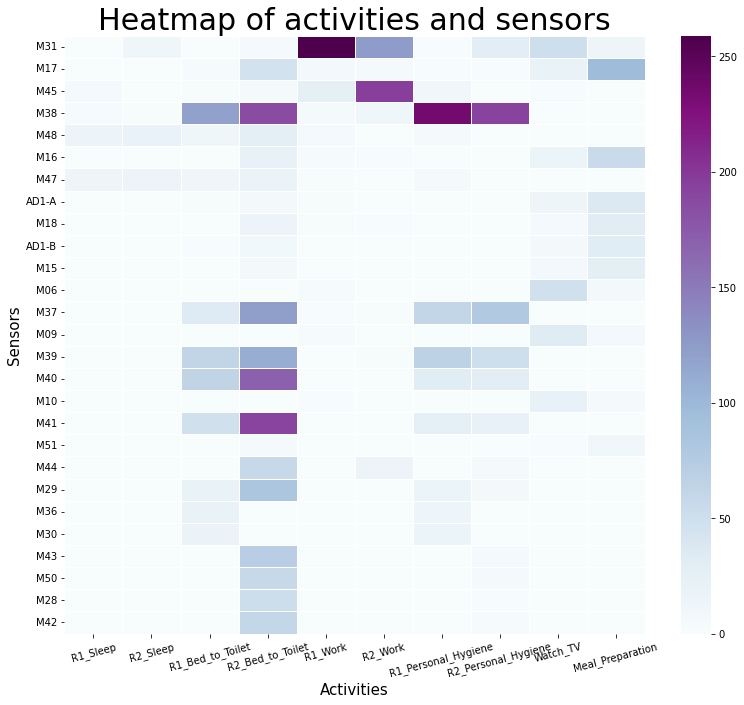

In [30]:
#Heatmap of activities and sensors
sns.set_context({"figure.figsize":(13,11)})
#sns.color_palette("rocket", as_cmap=True)
sns.heatmap(data=df_activities,square=False,cmap="BuPu",linewidths=.5) 
#sns.color_palette("hls", 8)
plt.xticks(rotation=15)
plt.xlabel("Activities", fontsize = 15)
plt.ylabel("Sensors", fontsize = 15)
plt.title("Heatmap of activities and sensors", fontsize = 30)
#df_activities

<AxesSubplot:>

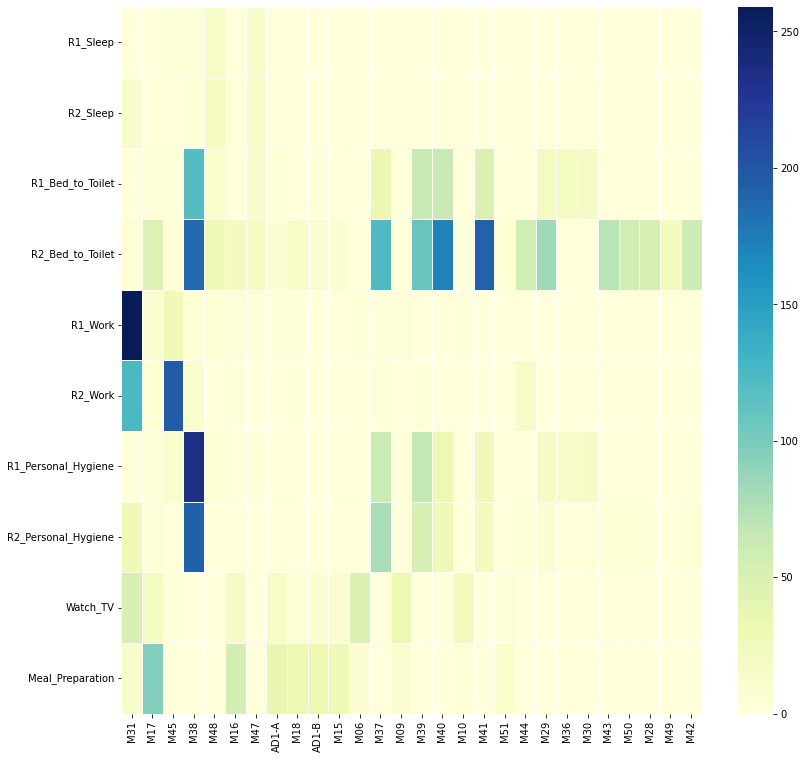

In [18]:
#Turn display, no difference.
df_activities = df_activities.T
sns.set_context({"figure.figsize":(13,13)})
sns.heatmap(data=df_activities,square=False,cmap="YlGnBu",linewidths=.5) 

In [19]:
#data value display
df_activities.loc["sum"] =df_activities.apply(lambda x:x.sum()) 
df_activities

,M31,M17,M45,M38,M48,M16,M47,AD1-A,M18,AD1-B,...,M51,M44,M29,M36,M30,M43,M50,M28,M49,M42
R1_Sleep,0,0,6,4,16,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2_Sleep,13,0,0,3,20,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1_Bed_to_Toilet,1,4,3,120,12,1,13,3,1,2,...,1,0,21,21,18,0,0,0,1,0
R2_Bed_to_Toilet,5,46,5,186,28,23,19,7,16,9,...,5,57,83,1,1,71,57,52,24,60
R1_Work,259,8,27,5,6,4,3,3,3,1,...,1,1,0,0,0,0,0,0,0,0
R2_Work,125,5,196,12,0,2,0,0,2,1,...,0,16,0,1,0,0,1,0,0,0
R1_Personal_Hygiene,2,2,11,235,5,1,5,0,0,0,...,0,0,17,14,17,0,0,1,0,0
R2_Personal_Hygiene,30,2,0,193,1,1,0,1,0,1,...,0,5,7,0,0,6,5,2,1,4
Watch_TV,51,21,2,0,0,17,0,15,6,7,...,2,0,0,0,0,0,0,0,0,0
Meal_Preparation,14,97,1,1,0,55,0,37,32,31,...,11,0,0,0,0,0,0,0,0,0


In [20]:
#data value display
pd.set_option('display.max_columns', None)
df_activities

,M31,M17,M45,M38,M48,M16,M47,AD1-A,M18,AD1-B,M15,M06,M37,M09,M39,M40,M10,M41,M51,M44,M29,M36,M30,M43,M50,M28,M49,M42
R1_Sleep,0,0,6,4,16,0,14,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
R2_Sleep,13,0,0,3,20,0,16,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
R1_Bed_to_Toilet,1,4,3,120,12,1,13,3,1,2,1,0,34,0,62,64,0,48,1,0,21,21,18,0,0,0,1,0
R2_Bed_to_Toilet,5,46,5,186,28,23,19,7,16,9,7,0,123,0,110,170,0,192,5,57,83,1,1,71,57,52,24,60
R1_Work,259,8,27,5,6,4,3,3,3,1,1,4,2,4,1,1,2,0,1,1,0,0,0,0,0,0,0,0
R2_Work,125,5,196,12,0,2,0,0,2,1,1,0,3,0,3,1,0,1,0,16,0,1,0,0,1,0,0,0
R1_Personal_Hygiene,2,2,11,235,5,1,5,0,0,0,0,0,61,0,66,31,0,27,0,0,17,14,17,0,0,1,0,0
R2_Personal_Hygiene,30,2,0,193,1,1,0,1,0,1,1,0,78,1,51,30,1,23,0,5,7,0,0,6,5,2,1,4
Watch_TV,51,21,2,0,0,17,0,15,6,7,8,48,0,33,0,0,23,0,2,0,0,0,0,0,0,0,0,0
Meal_Preparation,14,97,1,1,0,55,0,37,32,31,29,7,0,8,0,0,5,0,11,0,0,0,0,0,0,0,0,0
